In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv('C:/Users/KUSHAGRA/Downloads/Disease Prediction Model/Training.csv')

In [3]:
train_data.head(10)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   
7        1          1                     0                    0          0   
8        1          1                     1                    0          0   
9        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   
5       0           0             0        0                 0  ...         0   
6       0           0             0        0                 0  ...         0   
7       0           0             0        0                 0  ...         0   
8       0           0             0        0                 0  ...         0   
9       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   
5             0                    0                     0   
6             0                    0                     0   
7             0                    0                     0   
8             0                    0                     0   
9             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   
5                   0        0                     0                  0   
6                   0        0                     0                  0   
7                   0        0                     0                  0   
8                   0        0                     0                  0   
9                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  
5  Fungal infection           NaN  
6  Fungal infection           NaN  
7  Fungal infection           NaN  
8  Fungal infection           NaN  
9  Fungal infection           NaN  

[10 rows x 134 columns]

In [4]:
train_data.shape

(4920, 134)

In [5]:
train_data.drop(['Unnamed: 133'], axis=1, inplace=True)

In [6]:
train_data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

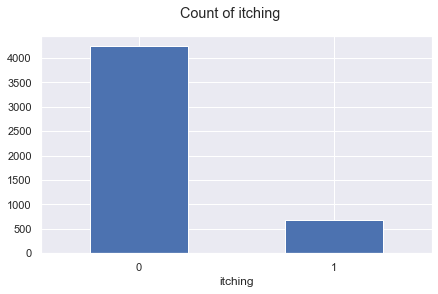

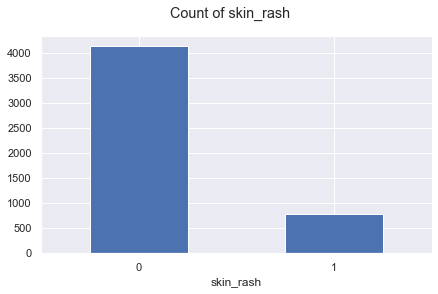

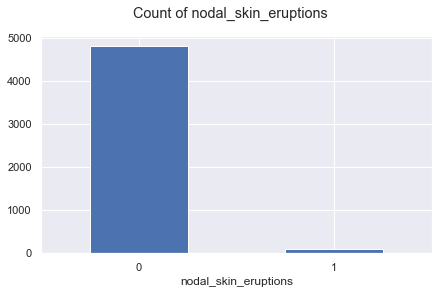

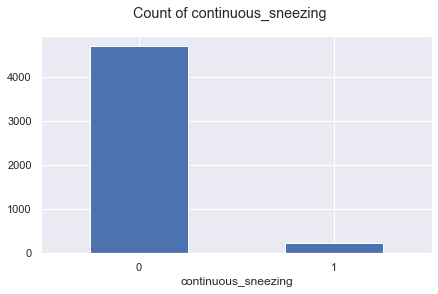

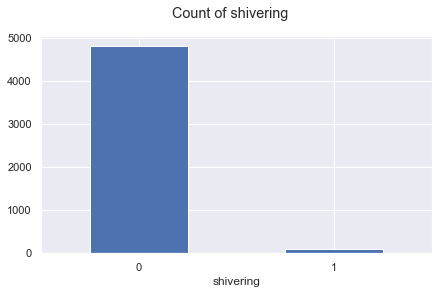

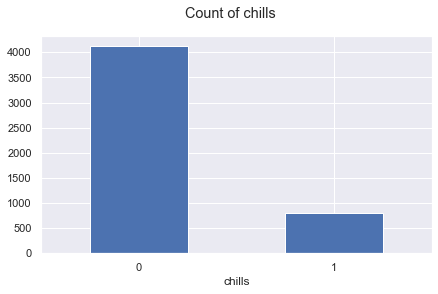

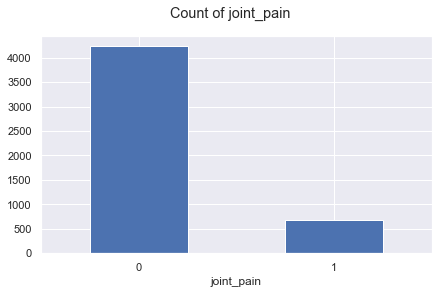

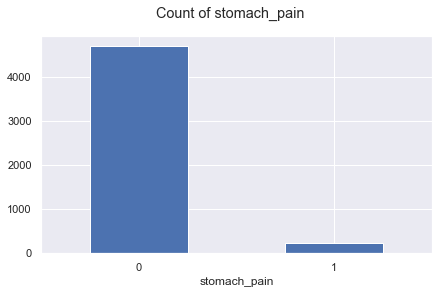

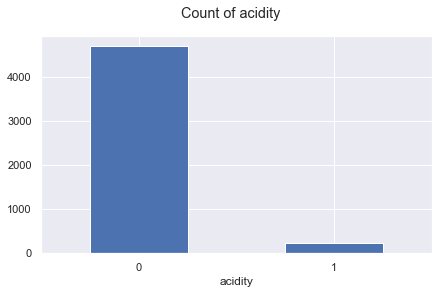

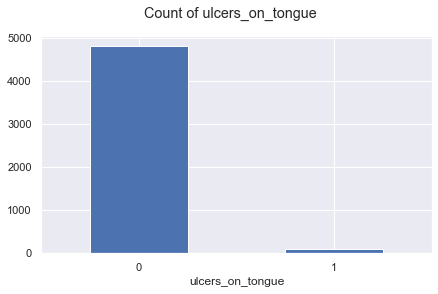

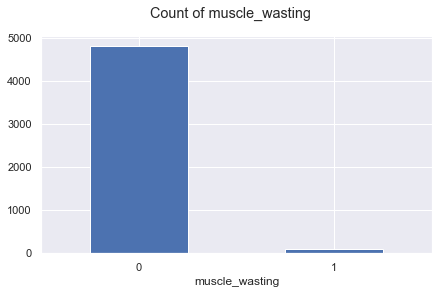

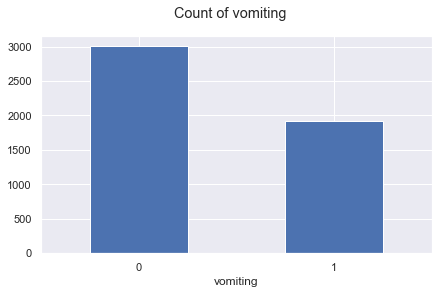

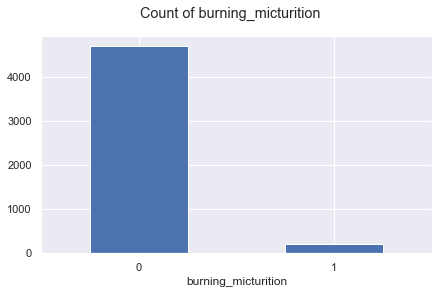

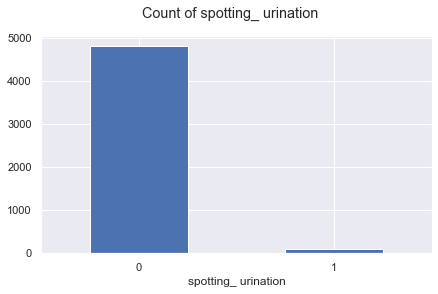

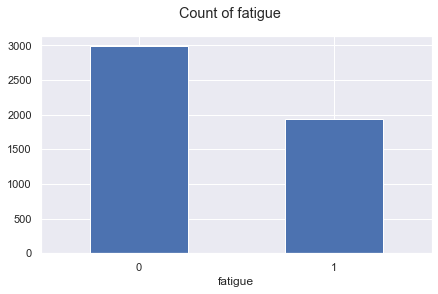

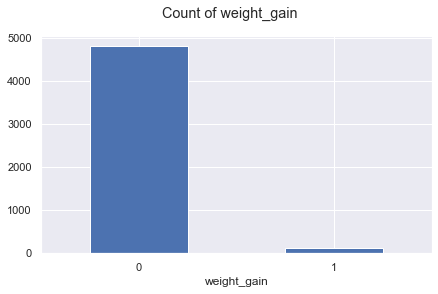

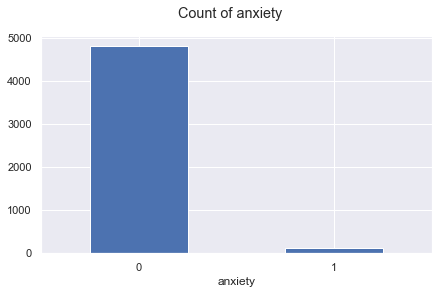

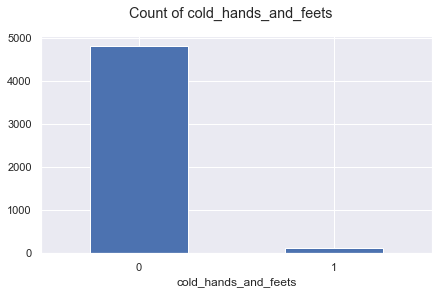

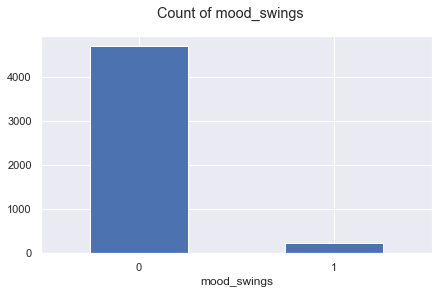

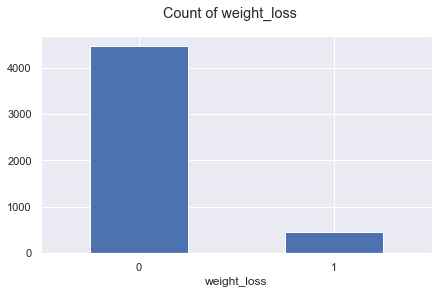

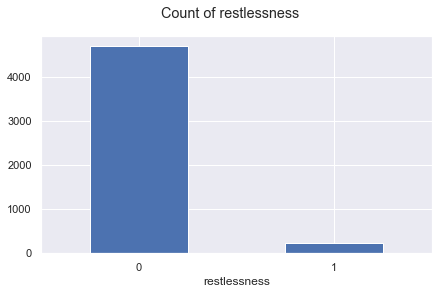

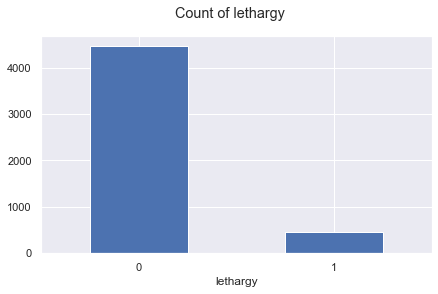

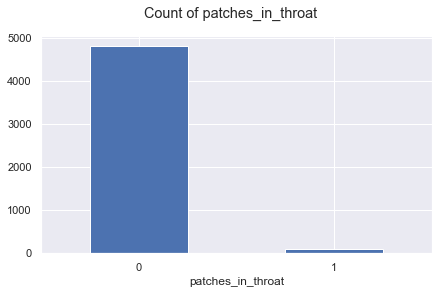

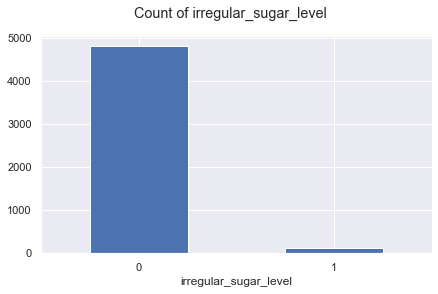

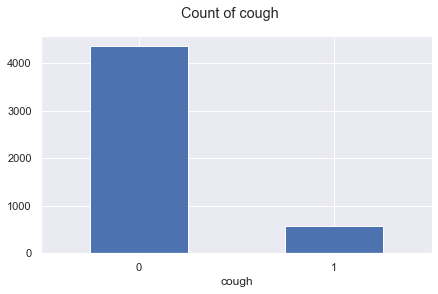

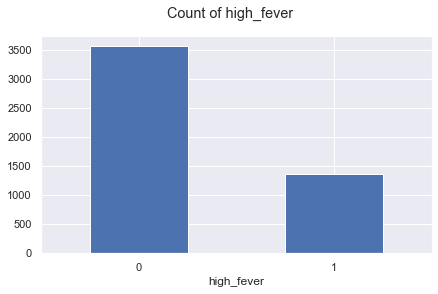

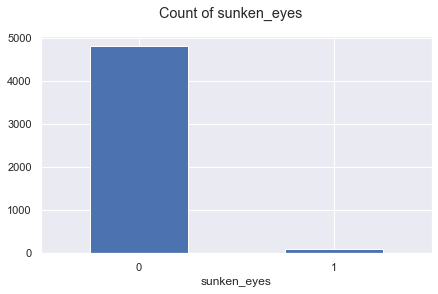

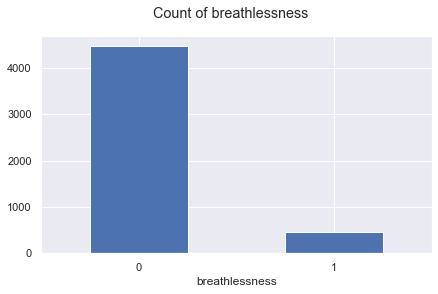

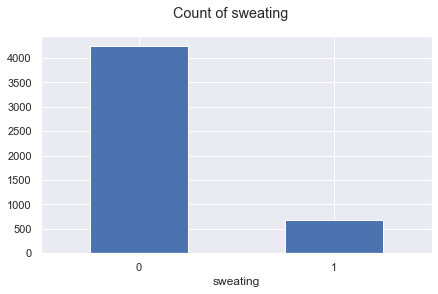

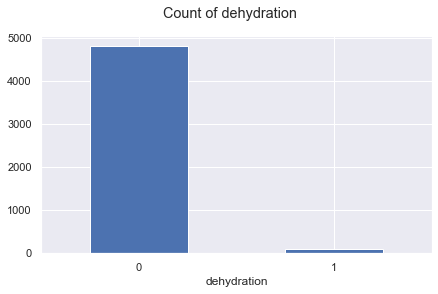

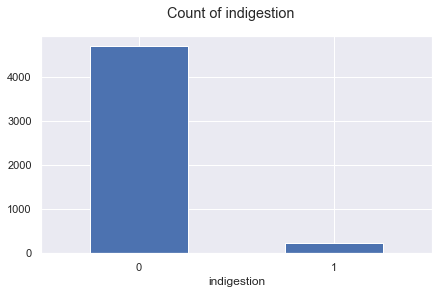

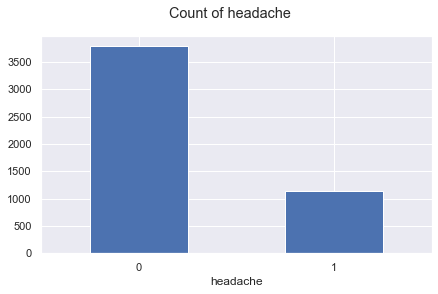

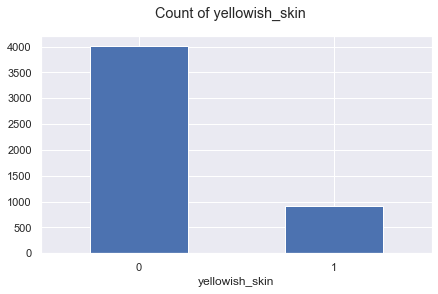

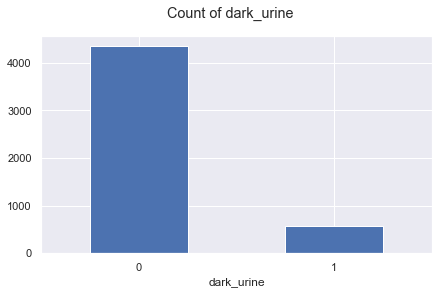

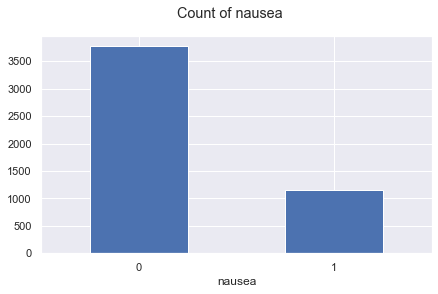

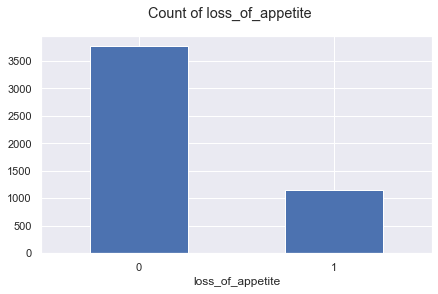

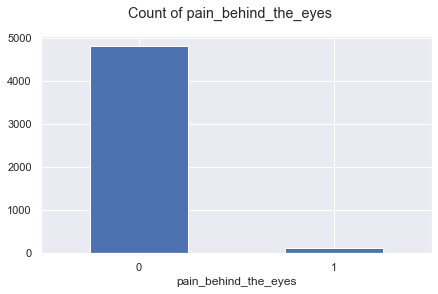

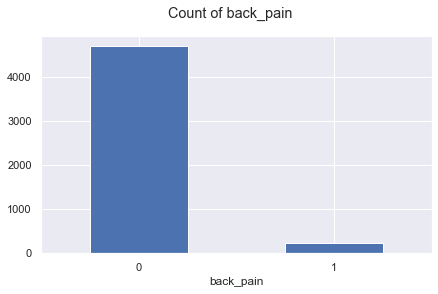

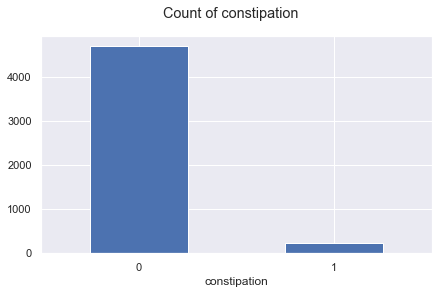

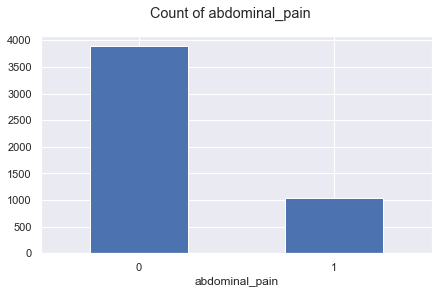

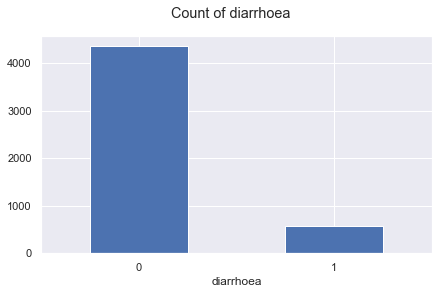

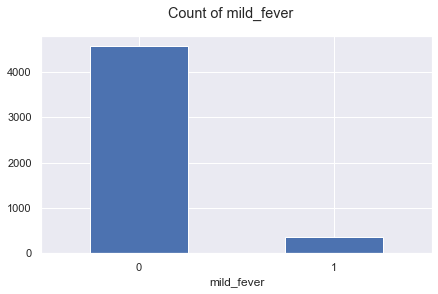

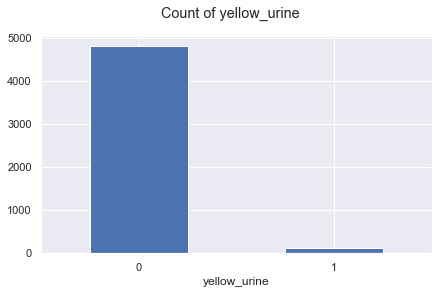

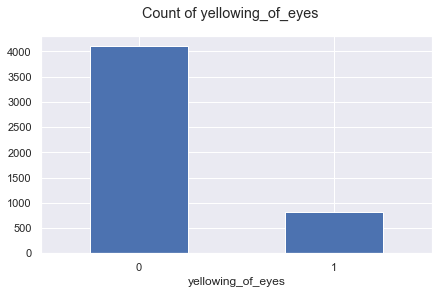

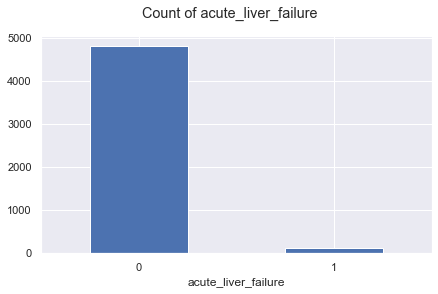

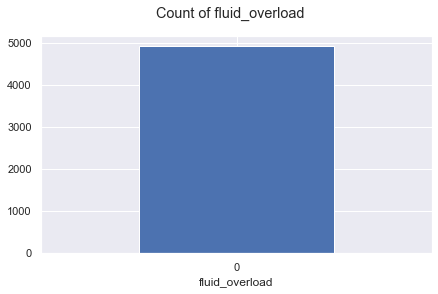

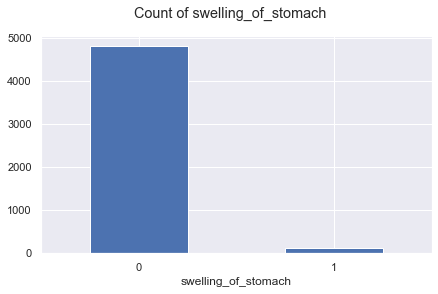

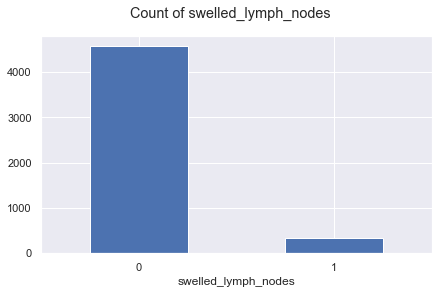

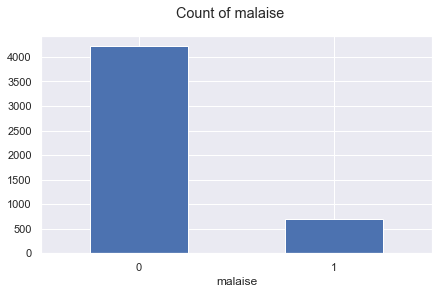

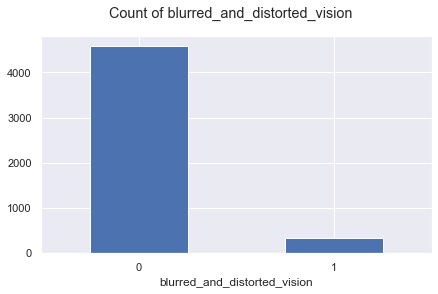

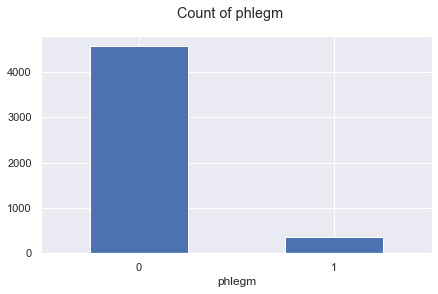

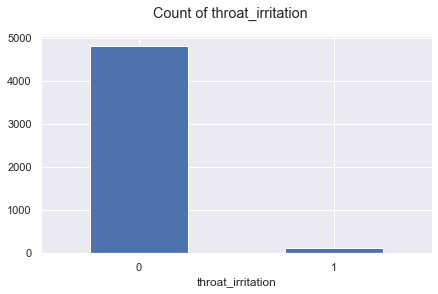

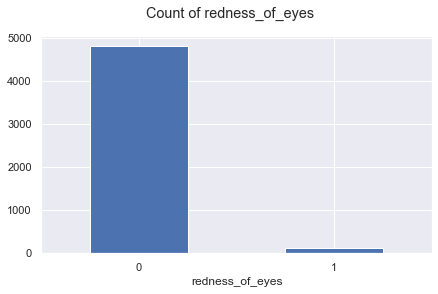

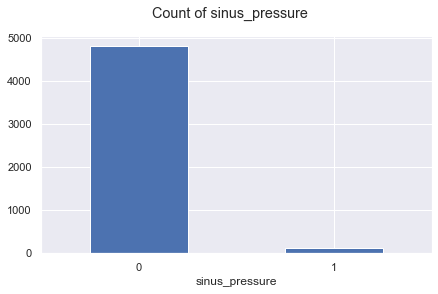

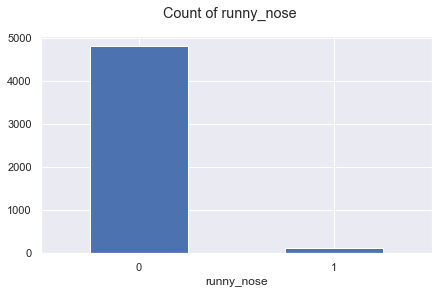

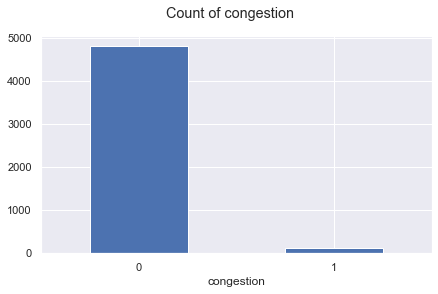

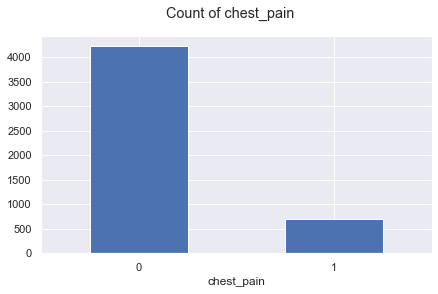

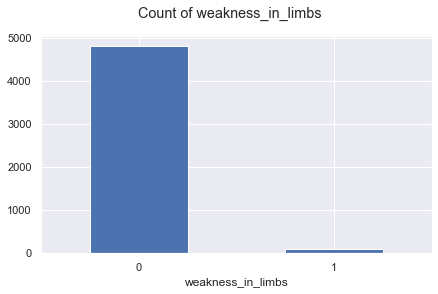

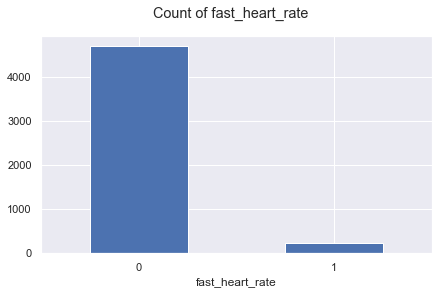

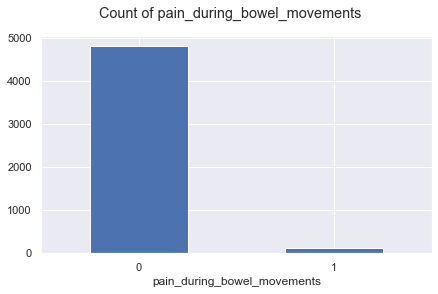

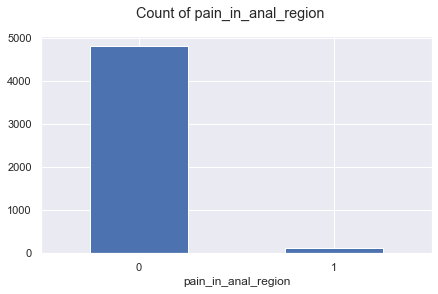

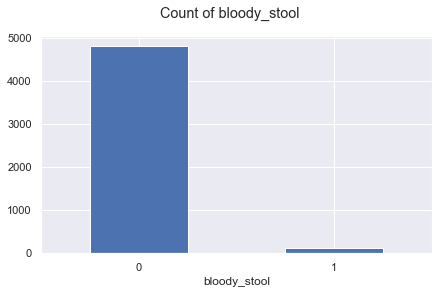

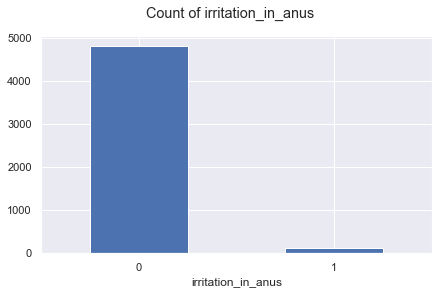

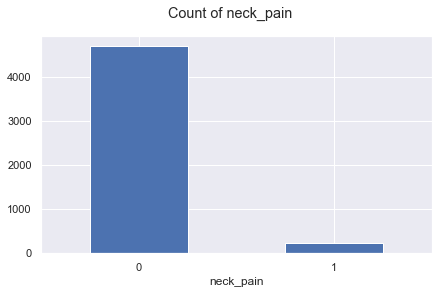

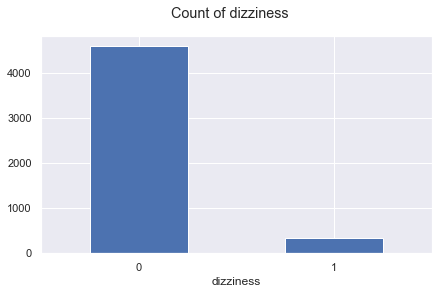

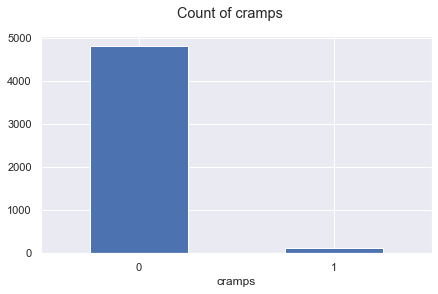

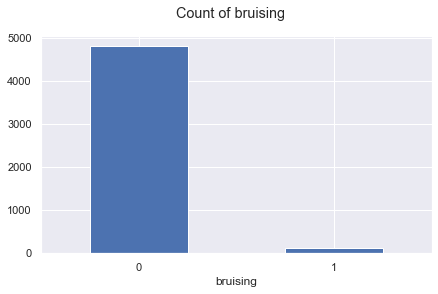

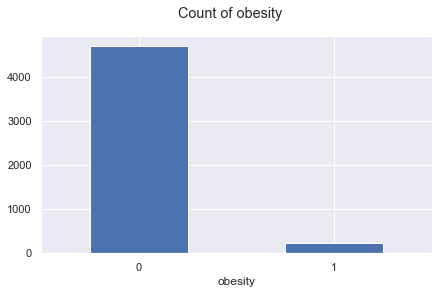

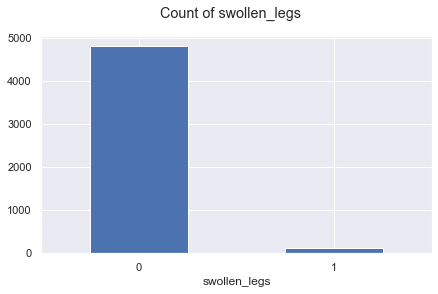

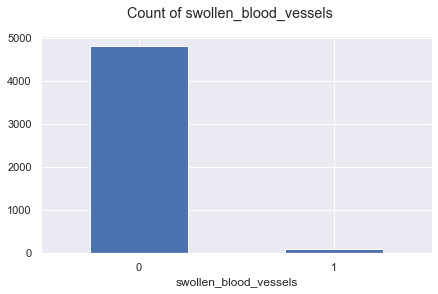

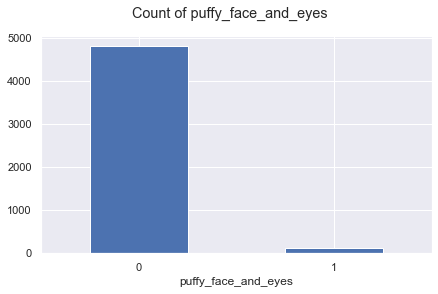

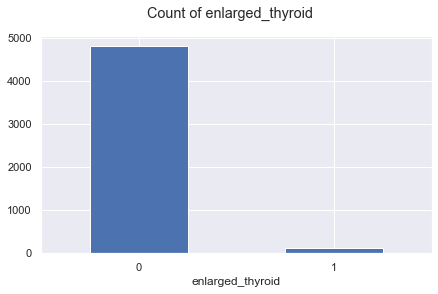

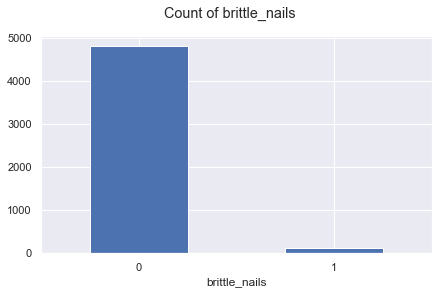

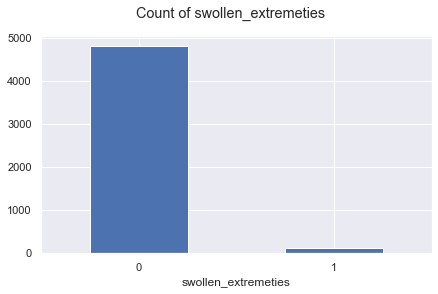

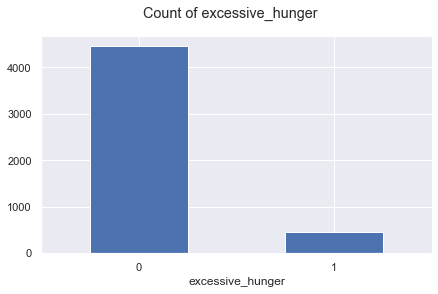

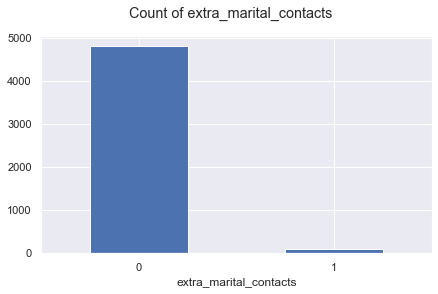

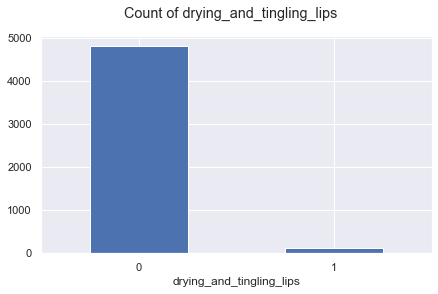

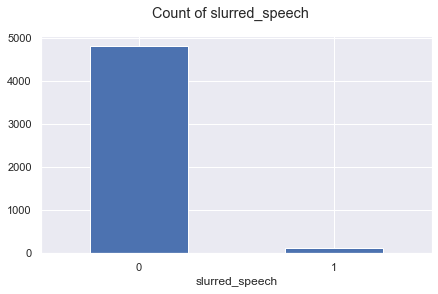

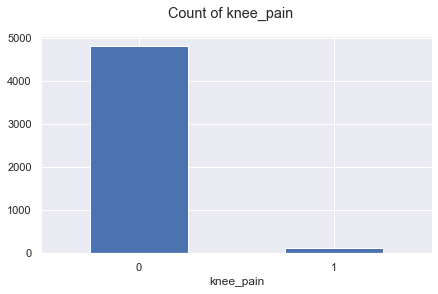

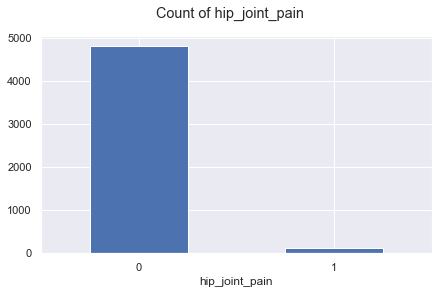

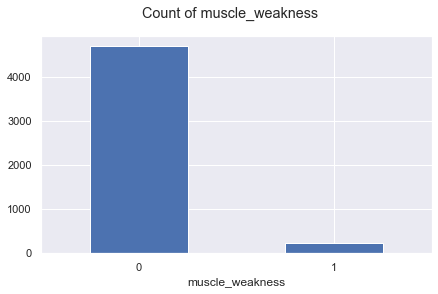

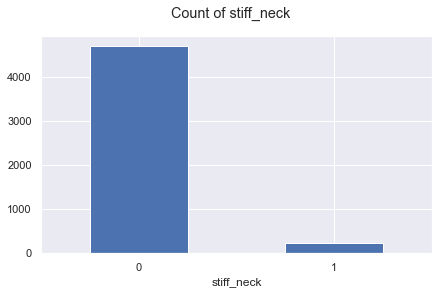

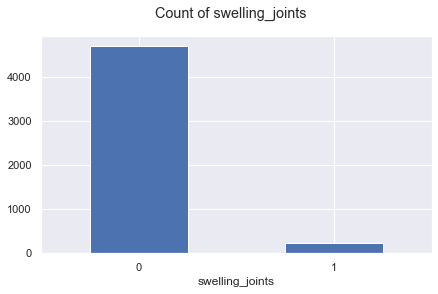

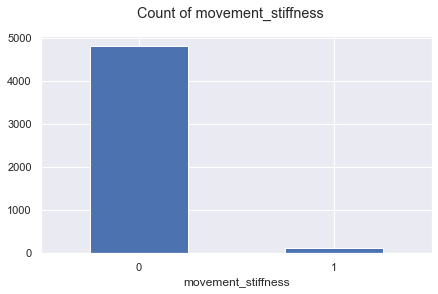

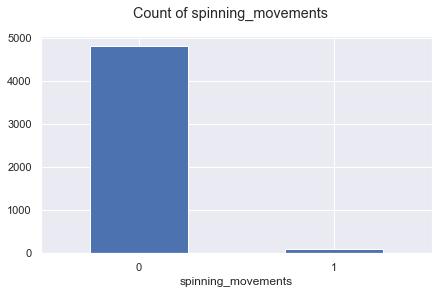

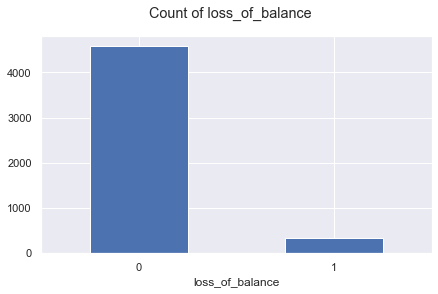

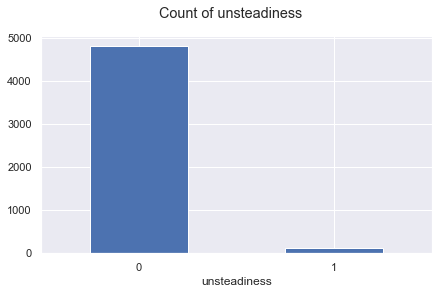

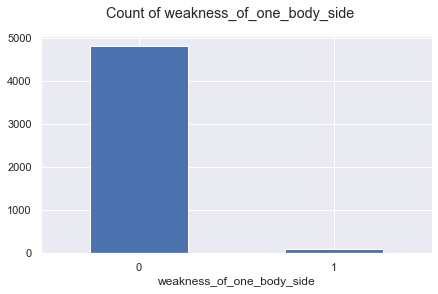

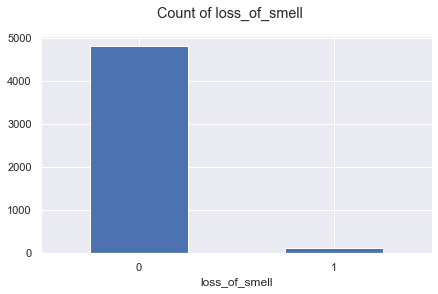

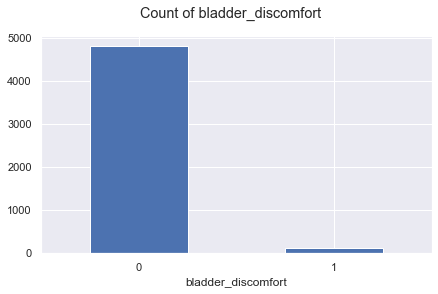

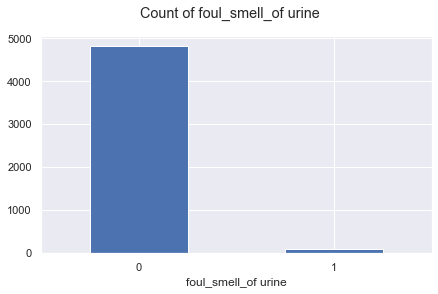

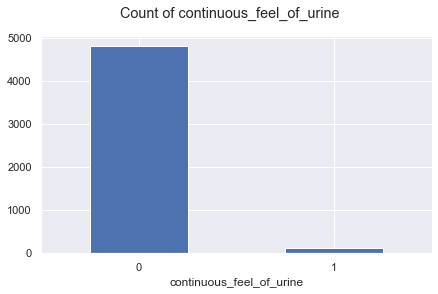

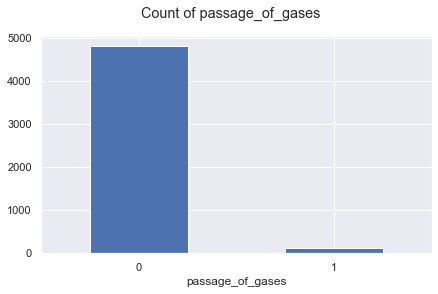

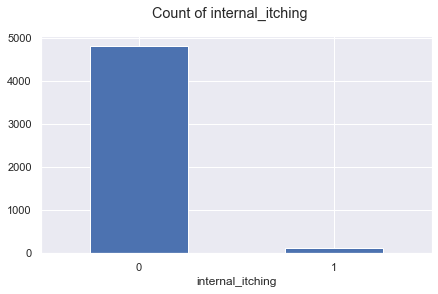

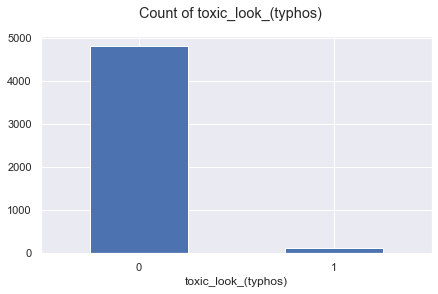

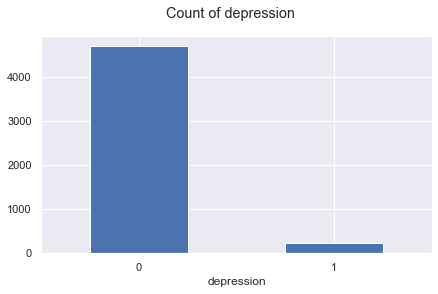

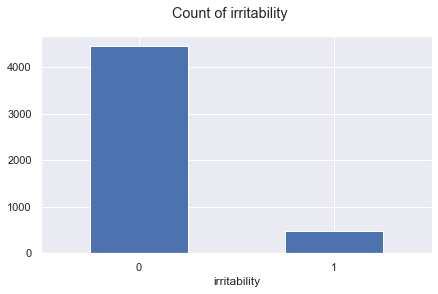

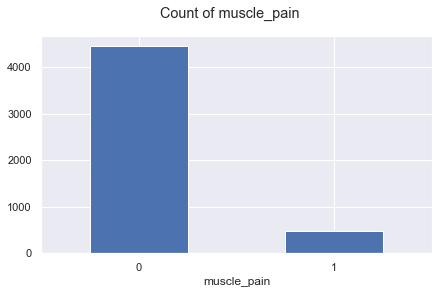

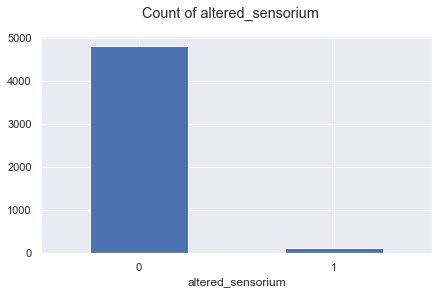

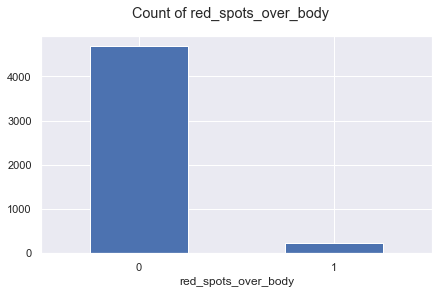

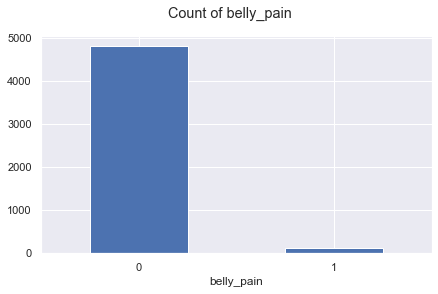

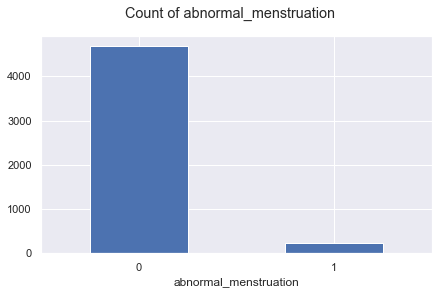

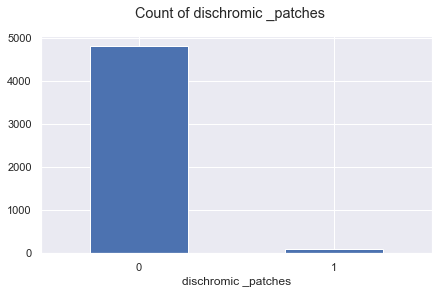

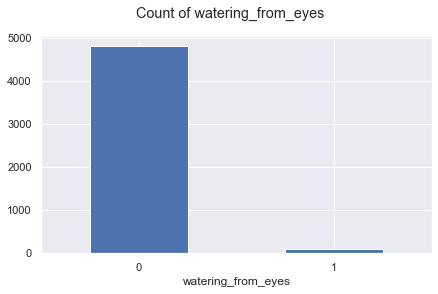

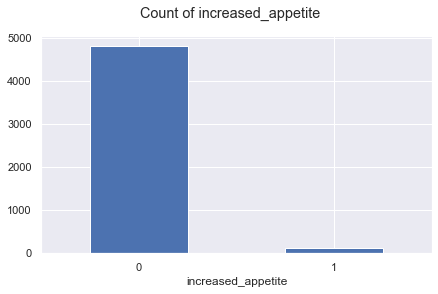

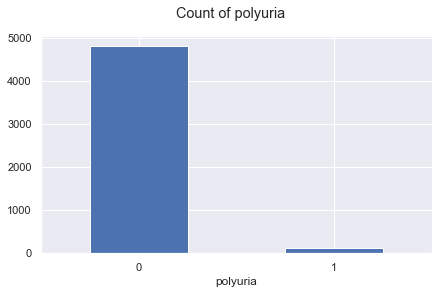

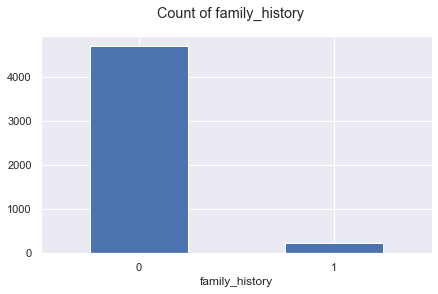

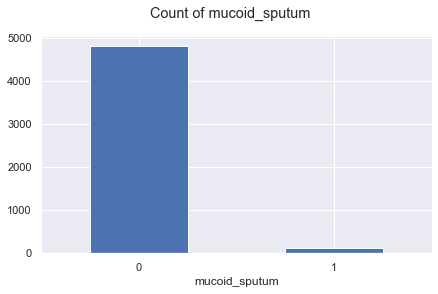

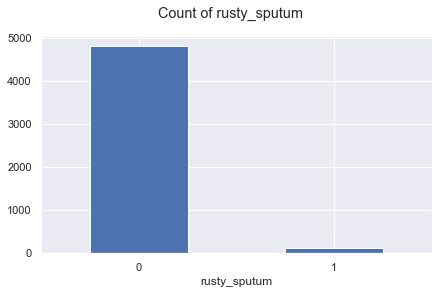

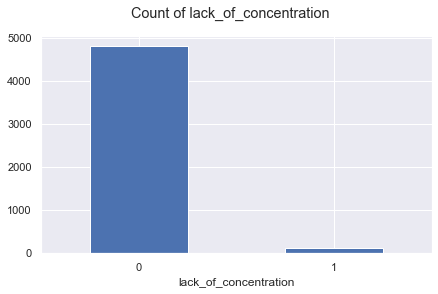

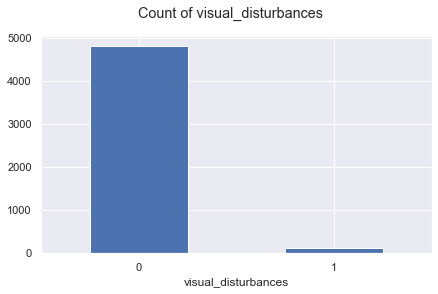

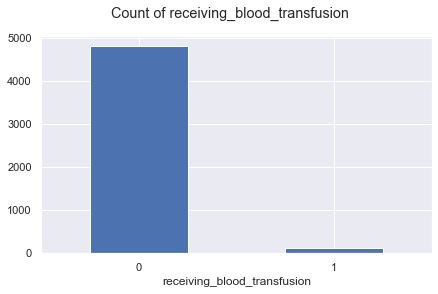

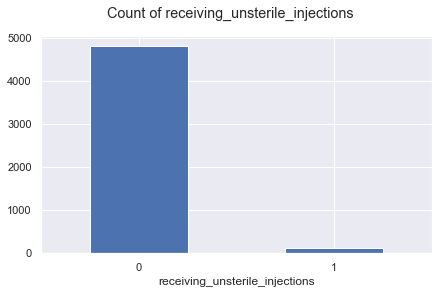

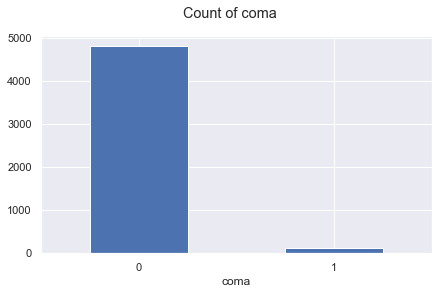

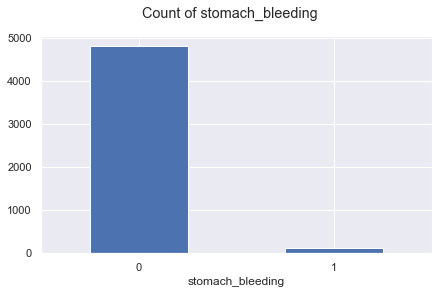

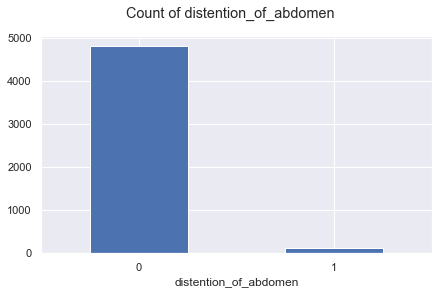

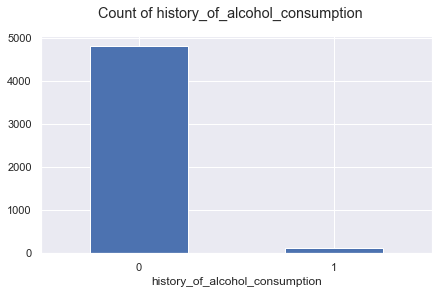

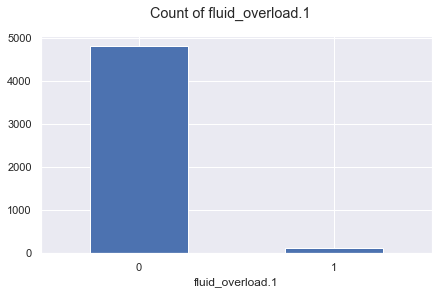

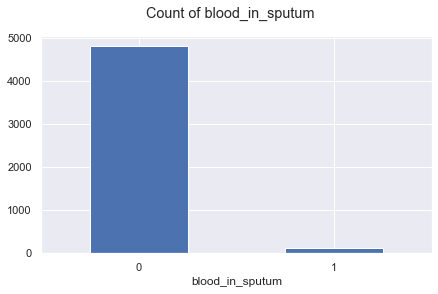

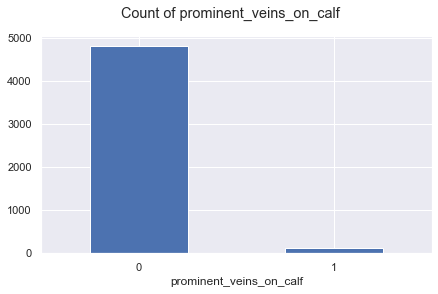

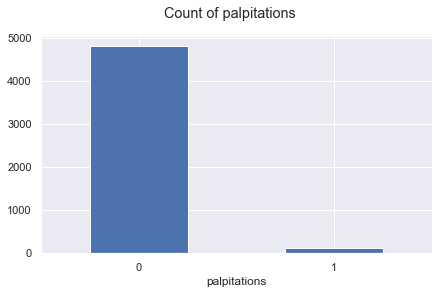

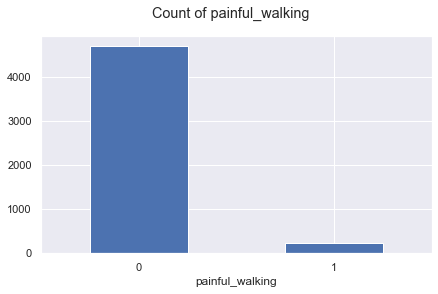

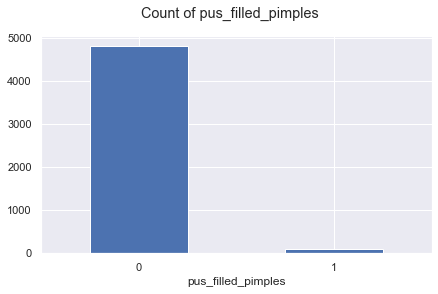

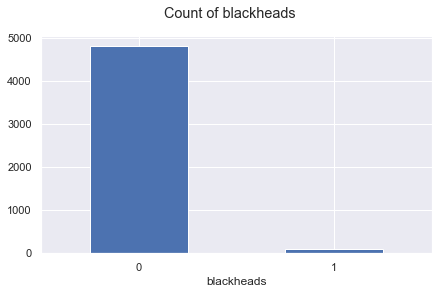

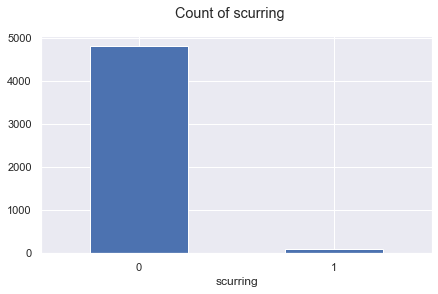

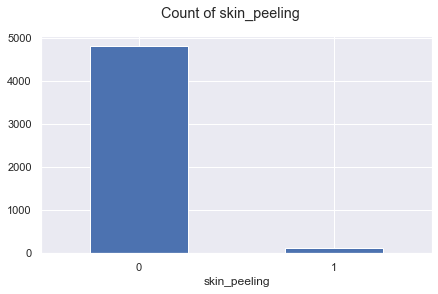

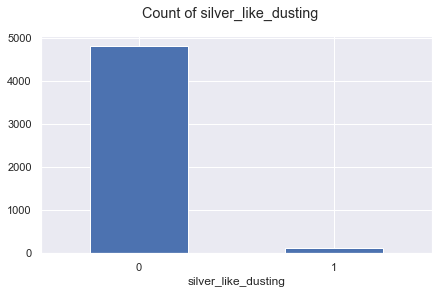

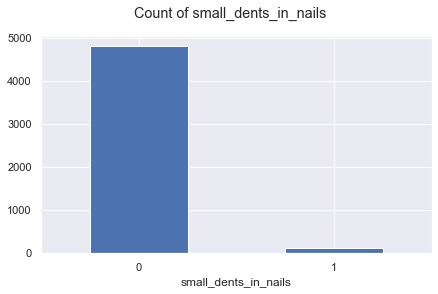

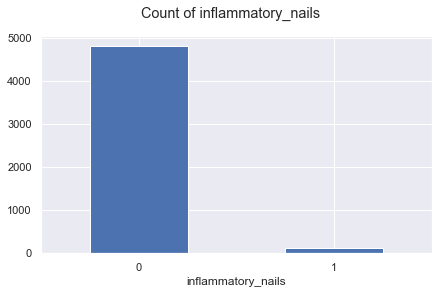

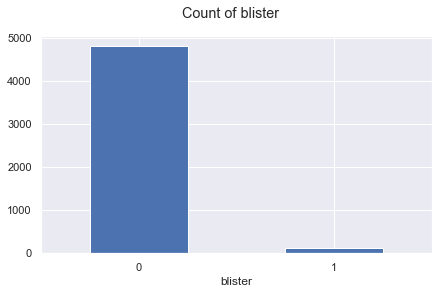

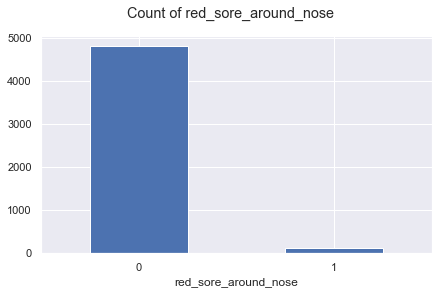

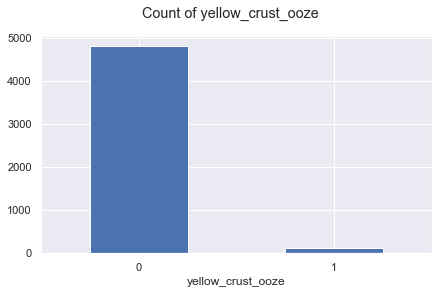

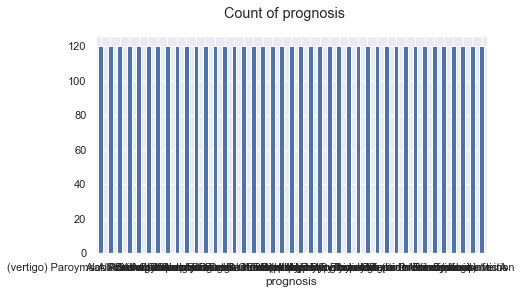

In [7]:
for x in train_data.columns:
    fig, ax = plt.subplots(figsize=(7, 4))
    bar = train_data.groupby(x).size().plot(kind='bar', ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle('Count of ' + str(x))

In [8]:
train_data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [9]:
train_data.prognosis.value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [10]:
list(train_data.columns)

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [11]:
train_data.corr()

itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.318158              0.326439   
skin_rash             0.318158   1.000000              0.298143   
nodal_skin_eruptions  0.326439   0.298143              1.000000   
continuous_sneezing  -0.086906  -0.094786             -0.032566   
shivering            -0.059893  -0.065324             -0.022444   
...                        ...        ...                   ...   
small_dents_in_nails -0.061573   0.331087             -0.023073   
inflammatory_nails   -0.061573   0.331087             -0.023073   
blister              -0.061573   0.331087             -0.023073   
red_sore_around_nose -0.061573   0.331087             -0.023073   
yellow_crust_ooze    -0.061573   0.331087             -0.023073   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086906  -0.059893 -0.175905   -0.160650   
skin_rash                       -0.094786  -0.065324 -0.029324    0.171134   
nodal_skin_eruptions            -0.032566  -0.022444 -0.065917   -0.060200   
continuous_sneezing              1.000000   0.608981  0.446238   -0.087351   
shivering                        0.608981   1.000000  0.295332   -0.060200   
...                                   ...        ...       ...         ...   
small_dents_in_nails            -0.033480  -0.023073 -0.067765    0.359845   
inflammatory_nails              -0.033480  -0.023073 -0.067765    0.359845   
blister                         -0.033480  -0.023073 -0.067765   -0.061889   
red_sore_around_nose            -0.033480  -0.023073 -0.067765   -0.061889   
yellow_crust_ooze               -0.033480  -0.023073 -0.067765   -0.061889   

                      stomach_pain   acidity  ulcers_on_tongue  ...  \
itching                   0.202850 -0.086906         -0.059893  ...   
skin_rash                 0.161784 -0.094786         -0.065324  ...   
nodal_skin_eruptions     -0.032566 -0.032566         -0.022444  ...   
continuous_sneezing      -0.047254 -0.047254         -0.032566  ...   
shivering                -0.032566 -0.032566         -0.022444  ...   
...                            ...       ...               ...  ...   
small_dents_in_nails     -0.033480 -0.033480         -0.023073  ...   
inflammatory_nails       -0.033480 -0.033480         -0.023073  ...   
blister                  -0.033480 -0.033480         -0.023073  ...   
red_sore_around_nose     -0.033480 -0.033480         -0.023073  ...   
yellow_crust_ooze        -0.033480 -0.033480         -0.023073  ...   

                      pus_filled_pimples  blackheads  scurring  skin_peeling  \
itching                        -0.059893   -0.059893 -0.059893     -0.061573   
skin_rash                       0.320859    0.320859  0.320859      0.331087   
nodal_skin_eruptions           -0.022444   -0.022444 -0.022444     -0.023073   
continuous_sneezing            -0.032566   -0.032566 -0.032566     -0.033480   
shivering                      -0.022444   -0.022444 -0.022444     -0.023073   
...                                  ...         ...       ...           ...   
small_dents_in_nails           -0.023073   -0.023073 -0.023073      0.946120   
inflammatory_nails             -0.023073   -0.023073 -0.023073      0.946120   
blister                        -0.023073   -0.023073 -0.023073     -0.023720   
red_sore_around_nose           -0.023073   -0.023073 -0.023073     -0.023720   
yellow_crust_ooze              -0.023073   -0.023073 -0.023073     -0.023720   

                      silver_like_dusting  small_dents_in_nails  \
itching                         -0.061573             -0.061573   
skin_rash                        0.331087              0.331087   
nodal_skin_eruptions            -0.023073             -0.023073   
continuous_sneezing             -0.033480             -0.033480   
shivering                       -0.023073             -0.023073   
...                                   ...                   ...  

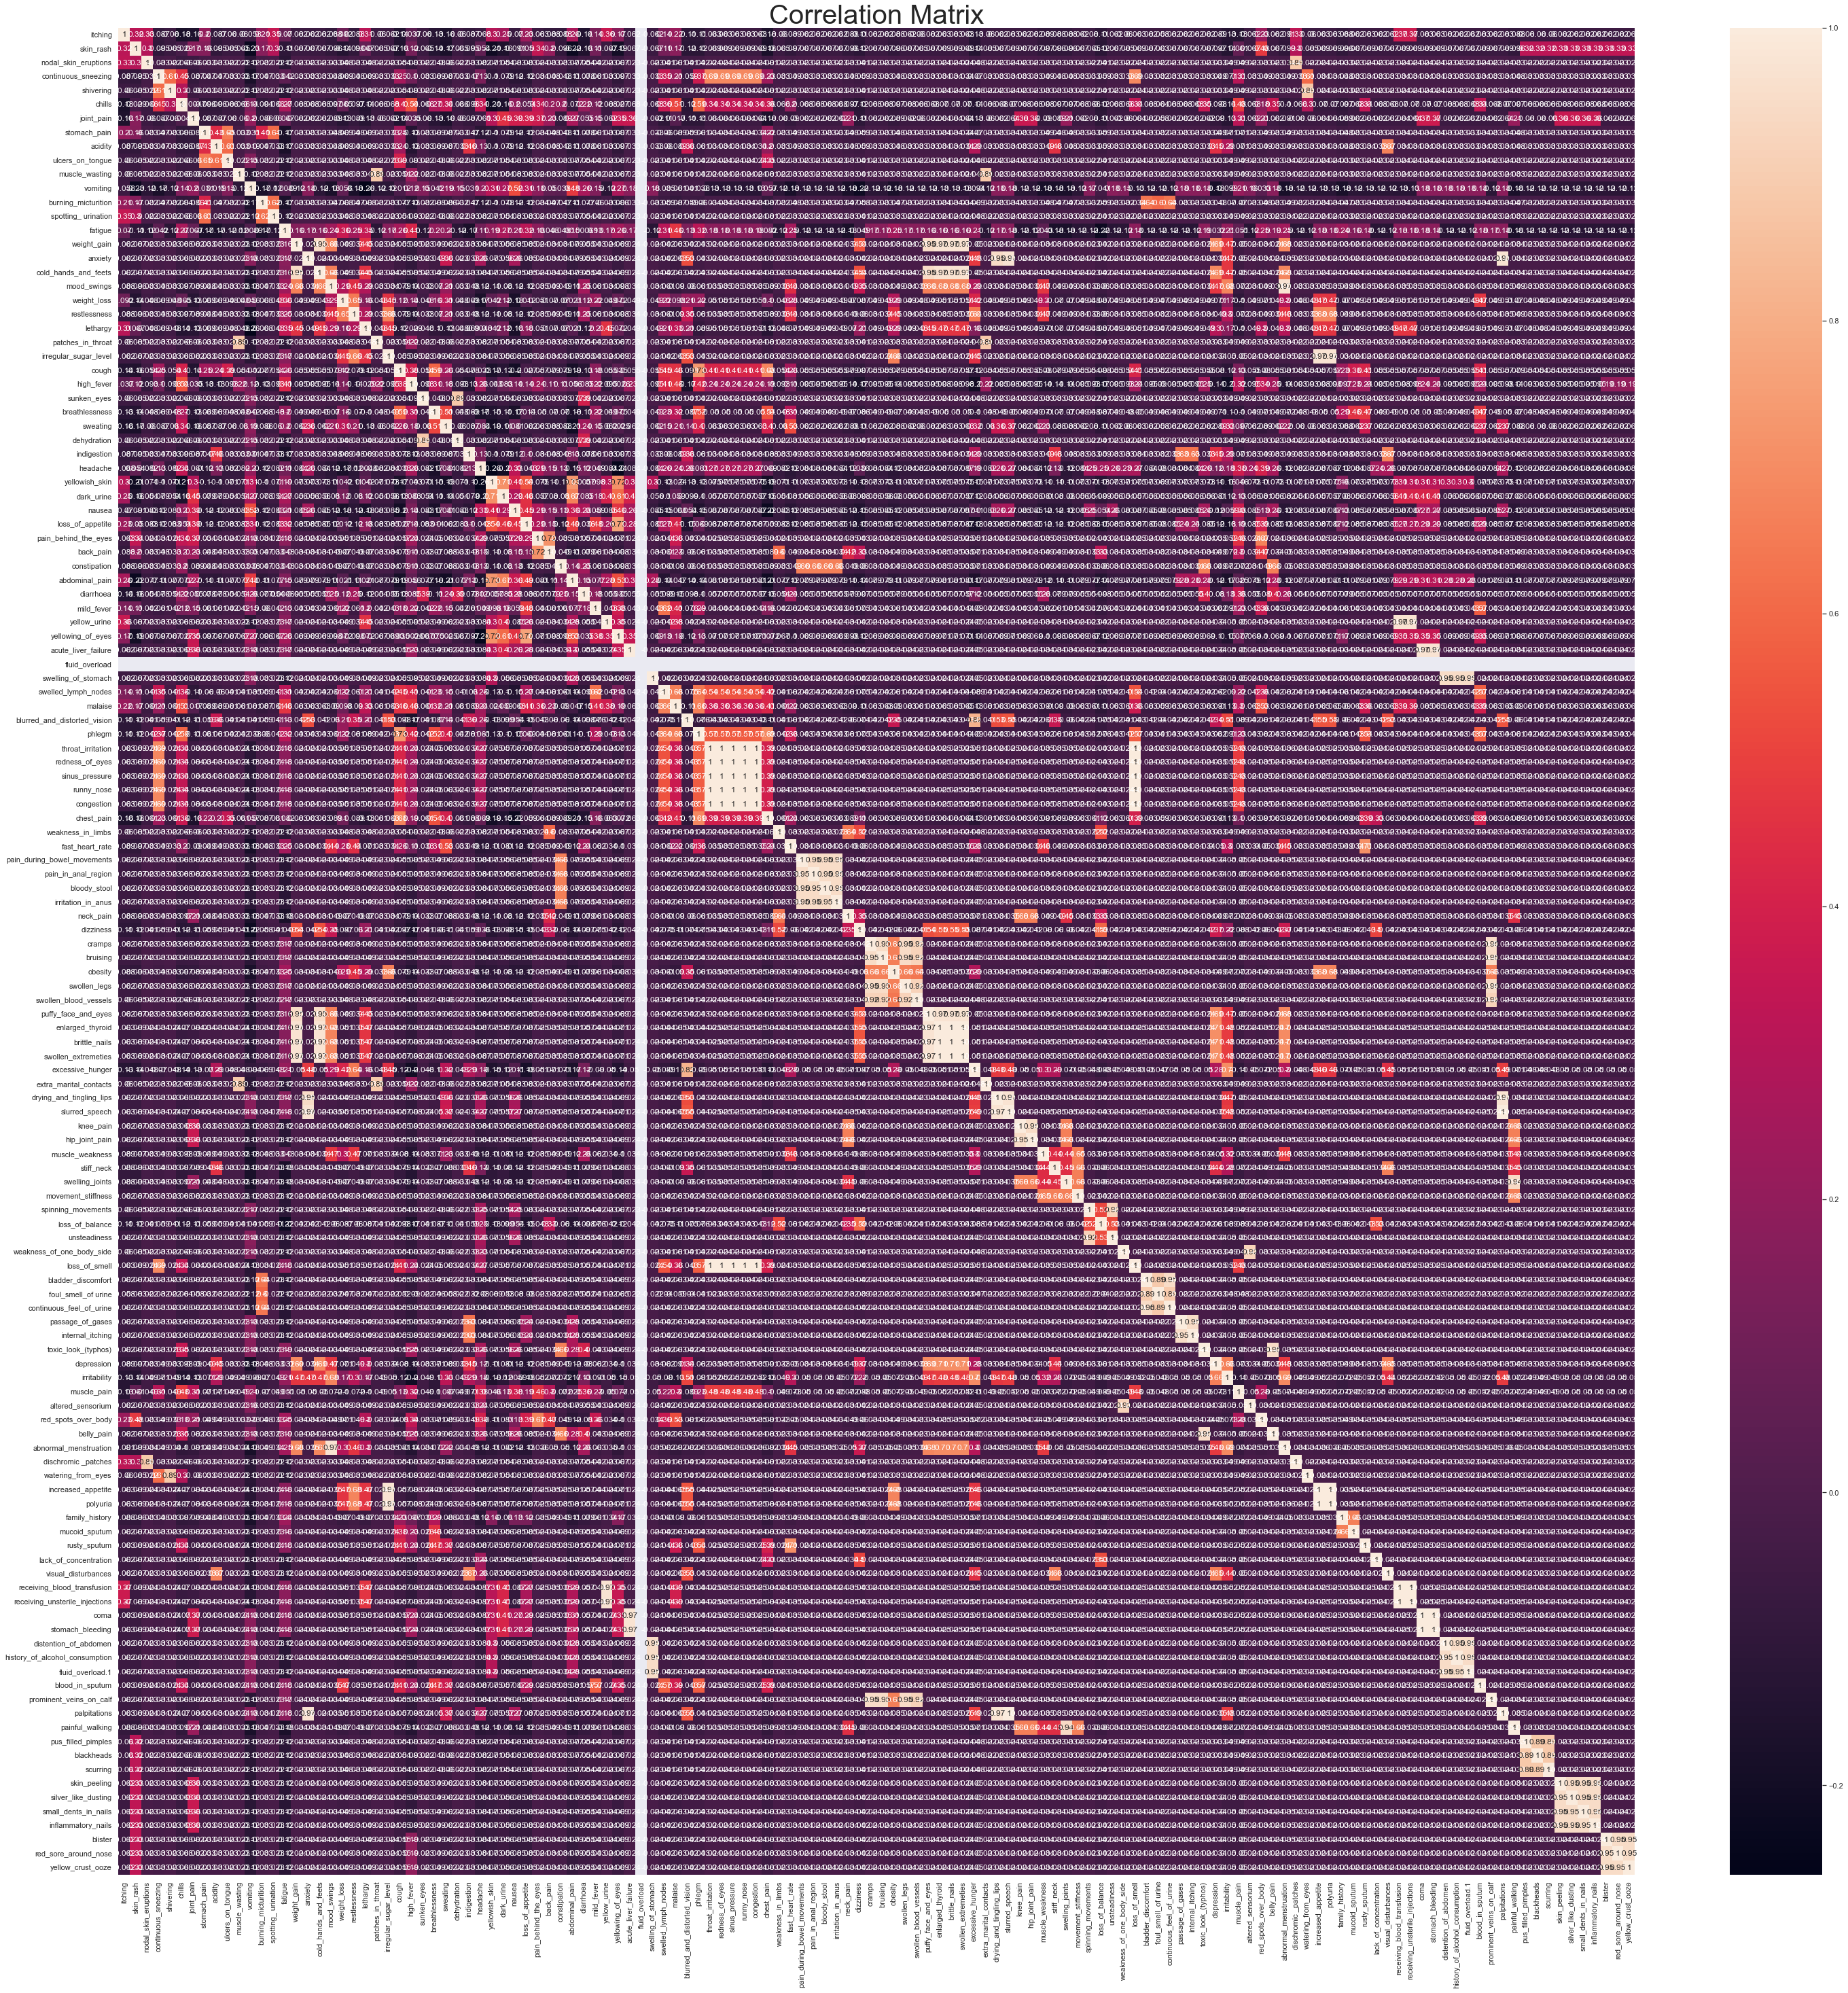

In [30]:
plt.figure(figsize = (50, 50))
sns.heatmap(train_data.corr(), annot = True)
plt.title('Correlation Matrix', fontsize=40);

In [12]:
train_data.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples   blackheads     scurring  \
count       4920.000000  ...         4920.000000  4920.000000  4920.000000   
mean           0.021951  ...            0.021951     0.021951     0.021951   
std            0.146539  ...            0.146539     0.146539     0.146539   
min            0.000000  ...            0.000000     0.000000     0.000000   
25%            0.000000  ...            0.000000     0.000000     0.000000   
50%            0.000000  ...            0.000000     0.000000     0.000000   
75%            0.000000  ...            0.000000     0.000000     0.000000   
max            1.000000  ...            1.000000     1.000000     1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count   4920.000000          4920.000000           4920.000000   
mean       0.023171             0.023171              0.023171   
std        0.150461             0.150461              0.150461   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails      blister  red_sore_around_nose  \
count         4920.000000  4920.000000           4920.000000   
mean             0.023171     0.023171              0.023171   
std              0.150461     0.150461              0.150461   
min              0.000000     0.000000              0.000000   
25%              0.000000     0.000000              0.000000   
50%              0.000000     0.000000              0.000000   
75%              0.000000     0.000000              0.000000   
max              1.000000     1.000000              1.000000   

       yellow_crust_ooze  
count        4920.000000  
mean            0.023171  
std             0.150461  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

In [13]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, 132].values


In [14]:
X_train.shape

(4920, 132)

In [15]:
y_train.shape

(4920,)

## Model

In [16]:
model_rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [17]:
model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train)

MLPClassifier()

In [18]:
test_data = pd.read_csv('C:/Users/KUSHAGRA/Downloads/Disease Prediction Model/Testing.csv')

In [19]:
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, 132].values

In [20]:
X_test.shape

(42, 132)

In [21]:
y_test.shape

(42,)

## Predictions

#### Random Forest Classifier

In [22]:
predictions_rf = model_rf.predict(X_test)

In [23]:
pd.DataFrame({
    'Predicted': predictions_rf,
    'Actual_Disease' : y_test
}).head(10)

Predicted       Actual_Disease
0     Fungal infection     Fungal infection
1              Allergy              Allergy
2                 GERD                 GERD
3  Chronic cholestasis  Chronic cholestasis
4        Drug Reaction        Drug Reaction
5  Peptic ulcer diseae  Peptic ulcer diseae
6                 AIDS                 AIDS
7            Diabetes             Diabetes 
8      Gastroenteritis      Gastroenteritis
9     Bronchial Asthma     Bronchial Asthma

In [24]:
print('Accuracy of Random Forest Classifier Model: ', accuracy_score(y_test, predictions_rf))

Accuracy of Random Forest Classifier Model:  1.0


#### MLP Classifier

In [25]:
predictions_mlp = model_mlp.predict(X_test)

In [26]:
pd.DataFrame({
    'Predicted': predictions_mlp,
    'Actual_Disease' : y_test
}).head(10)

Predicted       Actual_Disease
0     Fungal infection     Fungal infection
1              Allergy              Allergy
2                 GERD                 GERD
3  Chronic cholestasis  Chronic cholestasis
4        Drug Reaction        Drug Reaction
5  Peptic ulcer diseae  Peptic ulcer diseae
6                 AIDS                 AIDS
7            Diabetes             Diabetes 
8      Gastroenteritis      Gastroenteritis
9     Bronchial Asthma     Bronchial Asthma

In [27]:
print('Accuracy of MLP Classifier Model: ', accuracy_score(y_test, predictions_mlp))

Accuracy of MLP Classifier Model:  0.9761904761904762
